<h1><center>Analyse de Données de Beans & Pods un fournisseur de Café</h1></center>

In [2]:
from pandas import read_csv
filename='./datasets/BeansDataSet.csv'

data=read_csv(filename)
print(data)#affiche du contenu  de notre fichier csv
print(data.shape)

    Channel Region  Robusta  Arabica  Espresso  Lungo  Latte  Cappuccino
0    Online  South    12669     9656      7561    214   2674        1338
1    Online  South     7057     9810      9568   1762   3293        1776
2    Online  South     6353     8808      7684   2405   3516        7844
3     Store  South    13265     1196      4221   6404    507        1788
4    Online  South    22615     5410      7198   3915   1777        5185
..      ...    ...      ...      ...       ...    ...    ...         ...
435   Store  South    29703    12051     16027  13135    182        2204
436   Store  South    39228     1431       764   4510     93        2346
437  Online  South    14531    15488     30243    437  14841        1867
438   Store  South    10290     1981      2232   1038    168        2125
439   Store  South     2787     1698      2510     65    477          52

[440 rows x 8 columns]
(440, 8)


In [3]:
#statistique descriptive des vente
from pandas import set_option
set_option('display.width',100) #permet que nos données occupent tout l'ecran
set_option('display.precision',3)#permet d'afficher nos données avec trois chiffres apres la virgule
print(f'statistique descriptive\n--------------')
print(data.describe()) #describe() methode pour


statistique descriptive
--------------
          Robusta    Arabica   Espresso      Lungo      Latte  Cappuccino
count     440.000    440.000    440.000    440.000    440.000     440.000
mean    12000.298   5796.266   7951.277   3071.932   2881.493    1524.870
std     12647.329   7380.377   9503.163   4854.673   4767.854    2820.106
min         3.000     55.000      3.000     25.000      3.000       3.000
25%      3127.750   1533.000   2153.000    742.250    256.750     408.250
50%      8504.000   3627.000   4755.500   1526.000    816.500     965.500
75%     16933.750   7190.250  10655.750   3554.250   3922.000    1820.250
max    112151.000  73498.000  92780.000  60869.000  40827.000   47943.000


In [4]:
#Distribution de classe (diagnostic)
print(f'distribution de classe(1 ou 0)\n--------------')
print(data.groupby('Cappuccino').size())

distribution de classe(1 ou 0)
--------------
Cappuccino
3        4
7        1
8        1
11       1
18       2
        ..
8550     1
14351    1
14472    1
16523    1
47943    1
Length: 403, dtype: int64


In [5]:
#Distribution de classe (diagnostic)
print(f'correlation \n--------------')
print(data.corr(method='pearson',numeric_only=True))

correlation 
--------------
            Robusta  Arabica  Espresso  Lungo  Latte  Cappuccino
Robusta       1.000    0.101    -0.012  0.346 -0.102       0.245
Arabica       0.101    1.000     0.728  0.124  0.662       0.406
Espresso     -0.012    0.728     1.000 -0.040  0.925       0.205
Lungo         0.346    0.124    -0.040  1.000 -0.132       0.391
Latte        -0.102    0.662     0.925 -0.132  1.000       0.069
Cappuccino    0.245    0.406     0.205  0.391  0.069       1.000


In [6]:
#apercu des données
print(f'20 premiéres instances\n--------------')
print(data.head(10))
print(f'20 derniere instances\n--------------')
print(data.tail(10))

20 premiéres instances
--------------
  Channel Region  Robusta  Arabica  Espresso  Lungo  Latte  Cappuccino
0  Online  South    12669     9656      7561    214   2674        1338
1  Online  South     7057     9810      9568   1762   3293        1776
2  Online  South     6353     8808      7684   2405   3516        7844
3   Store  South    13265     1196      4221   6404    507        1788
4  Online  South    22615     5410      7198   3915   1777        5185
5  Online  South     9413     8259      5126    666   1795        1451
6  Online  South    12126     3199      6975    480   3140         545
7  Online  South     7579     4956      9426   1669   3321        2566
8   Store  South     5963     3648      6192    425   1716         750
9  Online  South     6006    11093     18881   1159   7425        2098
20 derniere instances
--------------
    Channel Region  Robusta  Arabica  Espresso  Lungo  Latte  Cappuccino
430   Store  South     3097     4230     16483    575    241        208

In [7]:
#type de données pour chaque attributs
print(f'type de données\n--------------')
print(data.dtypes)

type de données
--------------
Channel       object
Region        object
Robusta        int64
Arabica        int64
Espresso       int64
Lungo          int64
Latte          int64
Cappuccino     int64
dtype: object


In [8]:
#analyse de vente par region
region = data.groupby('Region').sum()
print(f'Analyse par region\n--------------')
print(region)

Analyse par region
--------------
         Robusta  Arabica  Espresso   Lungo   Latte  Cappuccino
Region                                                         
Central   464721   239144    433274  190132  173311       54506
North     854833   422454    570037  231026  204136      104327
South    3960577  1888759   2495251  930492  890410      512110


C:\Users\henri\AppData\Local\Temp\ipykernel_9248\1102044266.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region = data.groupby('Region').sum()


In [10]:
#affichage de la region avec le plus de vente grace a la fonction idxmax
region_max_ventes = data.groupby('Region')[['Robusta', 'Arabica', 'Espresso', 'Lungo', 'Latte', 'Cappuccino']].sum().idxmax()
print(region_max_ventes)

Robusta       South
Arabica       South
Espresso      South
Lungo         South
Latte         South
Cappuccino    South
dtype: object


In [12]:
#affichage de la region avec le moins de vente grace a la fonction idxmax
region_min_ventes = data.groupby('Region')[['Robusta', 'Arabica', 'Espresso', 'Lungo', 'Latte', 'Cappuccino']].sum().idxmin()
print(region_min_ventes)

Robusta       Central
Arabica       Central
Espresso      Central
Lungo         Central
Latte         Central
Cappuccino    Central
dtype: object


<h1><center>II.Rechercher des modèles / tendances dans les données.</center></h1>

Histogramme 
--------------


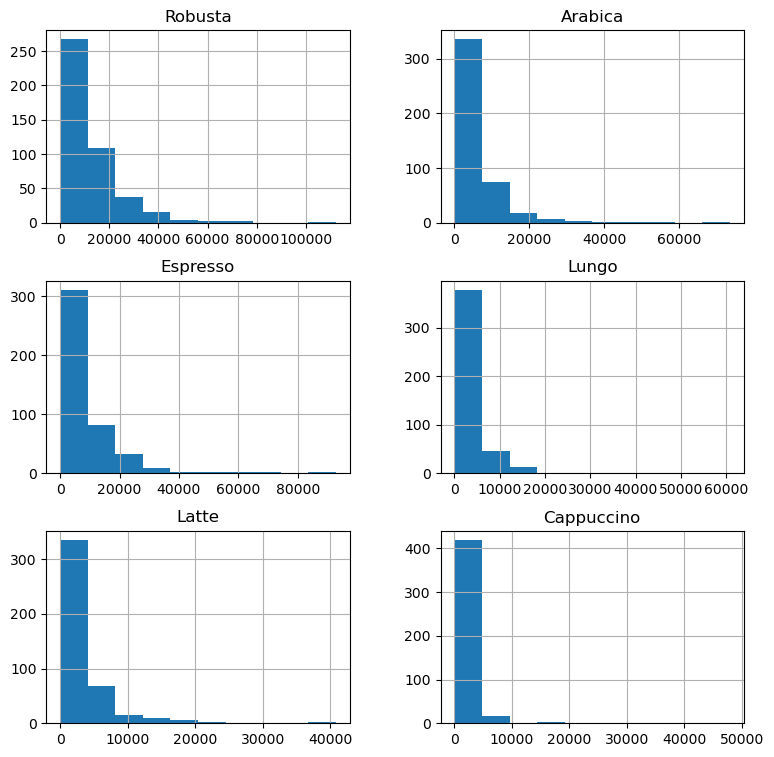

In [30]:
#Histogramme des ventes
from matplotlib import pyplot
print(f'Histogramme \n--------------')
data.hist(figsize=(9,9))
pyplot.show()

graphique de densité 
--------------


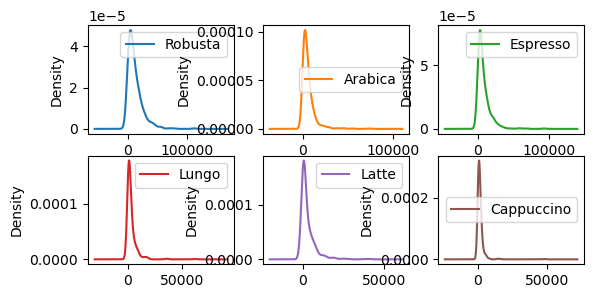

In [31]:
#densité
from matplotlib import pyplot
print(f'graphique de densité \n--------------')
data.plot(kind='density',subplots=True,layout=(3,3),sharex=False)
pyplot.show()

graphique de densité 
--------------


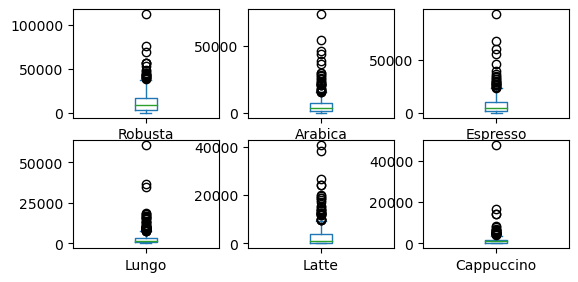

In [32]:
#boite a moustache affichage
from matplotlib import pyplot
print(f'graphique de boite a moustache \n--------------')
data.plot(kind='box',subplots=True,layout=(3,3),sharex=False)
pyplot.show()

<h1><cente>III-Suggérez des données supplémentaires que Beans &Pods devrait collecter à 
l’avenir</center></h1>

<h3>Beans&pods devrait collecter à l'avenir: <br>
-les données de vente annuelles,saisonnier,mensuelles<br>
-la quantité de la population par Region ou les données demographique<br>
-les données de pertes de vente Par Region <br>
-les données de satisfactions des clients<br>
-les données de pertes dur à l'expiration des produits</h3>

<h1><cente>IV-Fournir des recommandations pour la nouvelle campagne de marketing.</center></h1>

<h3>je leur recommande de:<br>
-de promouvoir et d'augmenter plus leurs produits dans la Region du Sud car le nombre de vente de leurs produits sont plus élevés dans cette region. <br>
-diminuer l'approvisionnement dans la region central car il y'a moins de vente dans cette Region.</h3>


<h1><cente>V-Préparez une présentation aux propriétaires de Beans &Pods incluant le 
résultat de votre analyse et vos recommandations.</center></h1>

d'aprés mes analyse j'ai constaté que les ventes s'effectue dans trois region qui sont le centre, le nord et le sud.on enregistre un plus grand nombres de  ventes dans  la region du sud et un trés faibles nombres de ventes dans la region du centre.on a pas de d'attribut sans valeur touts les attributs ont des valeurs.je recommande au propriétaire de Beans & pods de promouvoir et d'augmenter plus leurs produits dans la Region du Sud car le nombre de vente de leurs produits sont plus élevés dans cette region.
diminuer l'approvisionnement dans la region central car il y'a moins de vente dans cette Region.
